In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle as pkl

In [3]:
os.chdir("../data/nist")

In [4]:
!ls

HSF_0_byIMG.pkl   HSF_1_paths.pkl   HSF_3_labels.npy  HSF_6_images.npy
HSF_0_images.npy  HSF_2_byIMG.pkl   HSF_3_paths.pkl   HSF_6_labels.npy
HSF_0_labels.npy  HSF_2_images.npy  HSF_4_byIMG.pkl   HSF_6_paths.pkl
HSF_0_paths.pkl   HSF_2_labels.npy  HSF_4_images.npy  HSF_7_byIMG.pkl
HSF_1_byIMG.pkl   HSF_2_paths.pkl   HSF_4_labels.npy  HSF_7_images.npy
HSF_1_images.npy  HSF_3_byIMG.pkl   HSF_4_paths.pkl   HSF_7_labels.npy
HSF_1_labels.npy  HSF_3_images.npy  HSF_6_byIMG.pkl   HSF_7_paths.pkl


In [6]:
hsf = 4
with open('HSF_'+str(hsf)+'_images.npy','rb') as f:
    images = np.load(f)

with open('HSF_'+str(hsf)+'_labels.npy','rb') as f:
    labels = np.load(f)
    
with open('HSF_'+str(hsf)+'_paths.pkl','rb') as f:
    paths = pkl.load(f)
    
with open('HSF_'+str(hsf)+'_byIMG.pkl','rb') as f:
    byIMG = pkl.load(f)
    
#with open('HSF_'+str(hsf)+'_dupes.pkl','rb') as f:
    #dupes = pkl.load(f)

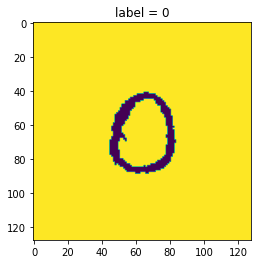

In [7]:
img = 6305 # the index is the 4th column of byIMG, and the 6th entry in paths
plt.imshow(np.unpackbits(images[img,:]).reshape((128,128)))
plt.title("label = " + str(labels[img]))
plt.show()

In [8]:
#dupes

In [10]:
img41 = mpimg.imread(dupes[0][0])
img42 = mpimg.imread(dupes[0][1])
plt.subplot(1,2,1)
plt.imshow(img41)
#plt.title(dupes[0][0][-18:-4])
plt.subplot(1,2,2)
plt.imshow(img42)
#plt.title(dupes[0][1][-18:-4])
plt.show()

NameError: name 'dupes' is not defined

In [8]:
images.shape

(58645, 2048)

In [9]:
labels.shape

(58645,)

In [10]:
len(byIMG)

58645

In [11]:
len(paths)

58646

### byIMG : data frame with 5 columns
1. path in by_field, 
1. file name in by_field, 
1. label (i.e. digit), 
1. index in numpy array, 
1. path in by_write

In [12]:
byIMG.head()

,0,1,2,3,4
0,by_field/hsf_4/digit/30/30_03718.png,30_03718.png,0,33833,by_write/hsf_4/f2437_50/d2437_50/d2437_50_0000...
1,by_field/hsf_4/digit/30/30_02158.png,30_02158.png,0,6305,by_write/hsf_4/f2297_69/d2297_69/d2297_69_0001...
2,by_field/hsf_4/digit/30/30_04713.png,30_04713.png,0,33320,by_write/hsf_4/f2525_62/d2525_62/d2525_62_0006...
3,by_field/hsf_4/digit/30/30_05153.png,30_05153.png,0,7991,by_write/hsf_4/f2564_59/d2564_59/d2564_59_0006...
4,by_field/hsf_4/digit/30/30_02539.png,30_02539.png,0,38941,by_write/hsf_4/f2332_97/d2332_97/d2332_97_0007...


### paths : dictionary, with values that are lists of 6 items
1. file name in by_write, 
1. author, 
1. path in by_field, 
1. file name in by_field, 
1. label (i.e. digit)
1. index in numpy array

In [13]:
next(iter(paths))

'by_write/hsf_4/f2596_86/d2596_86/d2596_86_00112.png'

In [14]:
next(iter(paths.values()))

['d2596_86_00112.png',
 'f2596_86',
 'by_field/hsf_4/digit/35/35_05505.png',
 '35_05505.png',
 '5',
 0]

In [22]:
df_paths = pd.DataFrame.from_dict(paths, orient='index')

In [33]:
column_dict={'index': "path_in_bywrite", 0: "filename_in_bywrite", 1: "author_id", 
             2: "path_in_byfield", 3: "filename_in_byfield",4:'label', 5:'array_index'}

In [35]:
df_paths = df_paths.reset_index().rename(columns=column_dict)

In [40]:
df_paths.author_id.describe()

count        58646
unique         500
top       f2406_72
freq           134
Name: author_id, dtype: object